In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [22]:
data = pd.read_csv("vacancy.csv")

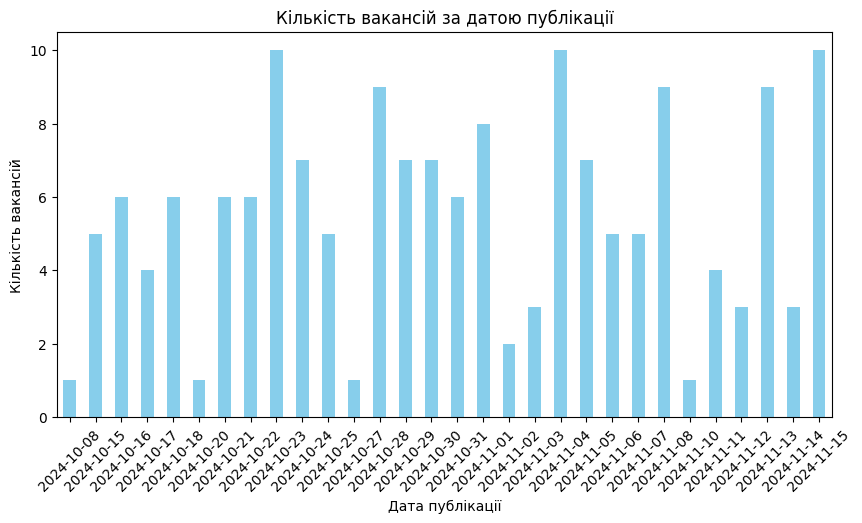

In [23]:
date_counts = data["publication_data"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
date_counts.plot(kind="bar", color="skyblue")
plt.title("Кількість вакансій за датою публікації")
plt.xlabel("Дата публікації")
plt.ylabel("Кількість вакансій")
plt.xticks(rotation=45)
plt.show()

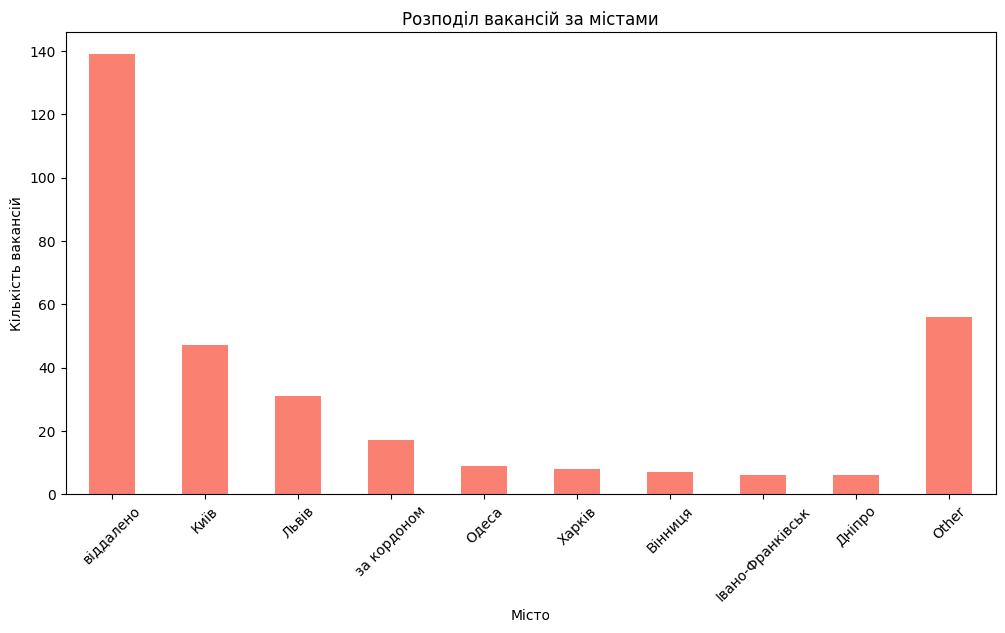

In [24]:
city_counts = data["location"].str.split(",").explode().str.strip()
city_counts = city_counts.value_counts()

filtered_cities = city_counts[city_counts > 5]
other_count = city_counts[city_counts <= 5].sum()
filtered_cities["Other"] = other_count

plt.figure(figsize=(12, 6))
filtered_cities.plot(kind="bar", color="salmon")
plt.title("Розподіл вакансій за містами")
plt.xlabel("Місто")
plt.ylabel("Кількість вакансій")
plt.xticks(rotation=45)
plt.show()

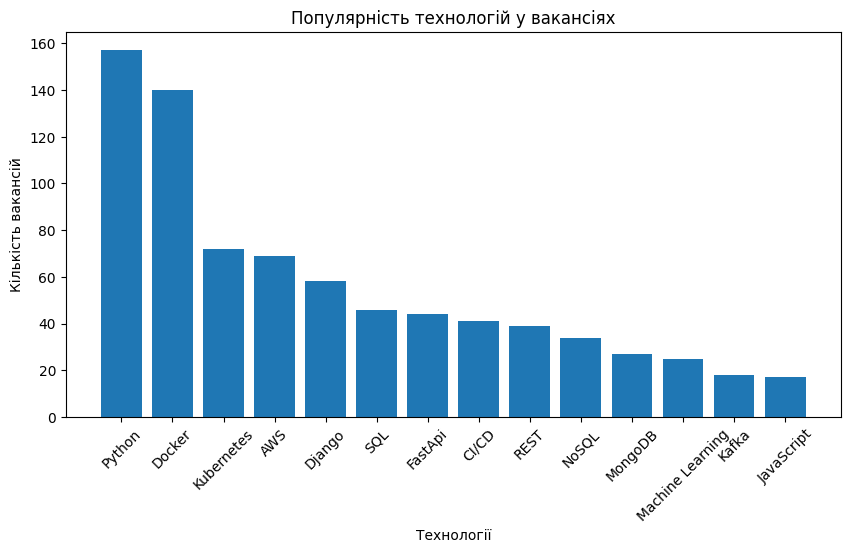

In [25]:
technologies = pd.read_csv("technologies.csv")["Technology"].tolist()
tech_count = {tech: 0 for tech in technologies}

def count_technologies(description):
    if isinstance(description, str):
        for tech in technologies:
            if re.search(r"\b" + re.escape(tech) + r"\b", description, re.IGNORECASE):
                tech_count[tech] += 1
                
data["description"].apply(count_technologies)
tech_count = {tech: count for tech, count in tech_count.items() if count > 15}
tech_count = dict(sorted(tech_count.items(), key=lambda item: item[1], reverse=True))

tech_names = list(tech_count.keys())
tech_values = list(tech_count.values())

plt.figure(figsize=(10, 5))
plt.bar(x=tech_names, height=tech_values)
plt.title("Популярність технологій у вакансіях")
plt.xlabel("Технології")
plt.ylabel("Кількість вакансій")
plt.xticks(rotation=45)
plt.show()